In [1]:
# API Requests
import pprint
import requests
import json
import time

# Data Science
import pandas as pd
import numpy as np
import scipy.stats as sc
# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Geocoding
from api_keys import opencage_key
from api_keys import geoapify_key

In [2]:
# Create a file path
filepath = "../Resources/full_dataframe.csv"

# Read in the data.
df = pd.read_csv(filepath)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          1917 non-null   int64  
 1   current_age        1917 non-null   int64  
 2   birth_year         1917 non-null   int64  
 3   birth_month        1917 non-null   int64  
 4   gender             1917 non-null   object 
 5   address            1917 non-null   object 
 6   state              1917 non-null   object 
 7   latitude           1917 non-null   float64
 8   longitude          1917 non-null   float64
 9   per_capita_income  1917 non-null   int64  
 10  yearly_income      1917 non-null   int64  
 11  total_debt         1917 non-null   int64  
 12  credit_score       1917 non-null   int64  
 13  num_credit_cards   1917 non-null   int64  
 14  debt_to_income     1917 non-null   float64
dtypes: float64(3), int64(9), object(3)
memory usage: 224.8+ KB


In [7]:
df.head()

,client_id,current_age,birth_year,birth_month,gender,address,state,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,debt_to_income
0,825,53,1966,11,Female,"7481 Brydon Road, La Verne, CA, 91750, United ...",CA,34.15,-117.76,29278,59696,127613,787,5,2.137714
1,1746,53,1966,12,Female,"51-17 Redfield Street, New York, NY, 11362, Un...",NY,40.76,-73.74,37891,77254,191349,701,5,2.476881
2,1718,81,1938,11,Female,"Nogales Street, West Covina, CA, 91792, United...",CA,34.02,-117.89,22681,33483,196,698,5,0.005854
3,708,63,1957,1,Female,"Market Slip, New York, NY, 10002, United State...",NY,40.71,-73.99,163145,249925,202328,722,4,0.809555
4,1164,43,1976,9,Male,"24;26 Caselli Avenue, San Francisco, CA, 94114...",CA,37.76,-122.44,53797,109687,183855,675,1,1.676179


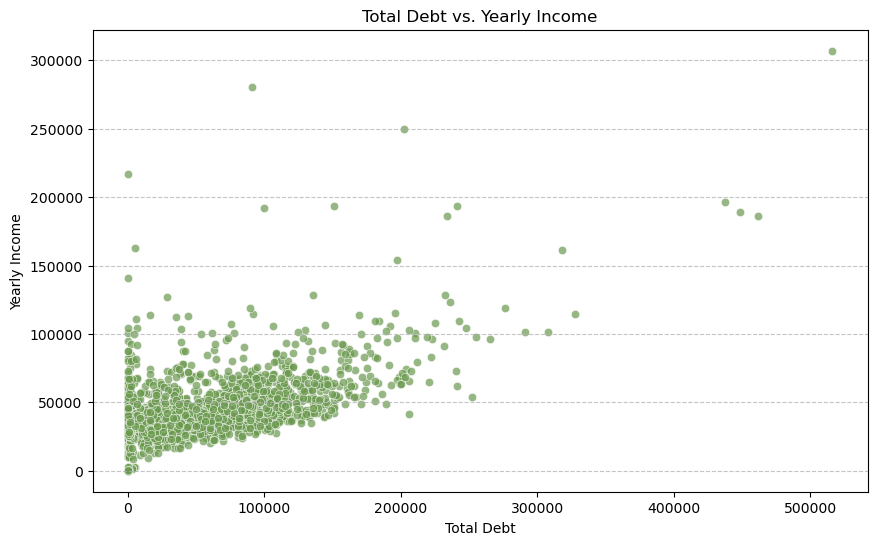

In [9]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatterplot using seaborn
sns.scatterplot(x='total_debt', y='yearly_income', data=df, color='#6a994e', alpha=0.7)

# Customize the plot with labels and title
plt.xlabel('Total Debt')
plt.ylabel('Yearly Income')
plt.title('Total Debt vs. Yearly Income')

# Add grid lines to improve readability
plt.grid(True, linestyle='--', alpha=0.75, axis='y')

# Show the plot
plt.show()

In [11]:
# Outlier Elimination

# Calculate the first (Q1) and third (Q3) quartiles for 'total_debt' and 'yearly_income'
Q1_debt = df['total_debt'].quantile(0.25)
Q3_debt = df['total_debt'].quantile(0.75)
IQR_debt = Q3_debt - Q1_debt

Q1_income = df['yearly_income'].quantile(0.25)
Q3_income = df['yearly_income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

# Define the lower and upper bounds for 'total_debt' and 'yearly_income'
lower_bound_debt = Q1_debt - 1.5 * IQR_debt
upper_bound_debt = Q3_debt + 1.5 * IQR_debt

lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

# Filter out rows where 'total_debt' or 'yearly_income' are outside the bounds
df_no_outliers = df[(df['total_debt'] >= lower_bound_debt) & (df['total_debt'] <= upper_bound_debt) &
                    (df['yearly_income'] >= lower_bound_income) & (df['yearly_income'] <= upper_bound_income)]

# Remove Outliers from the dataframe:
df2 = df_no_outliers

# Check the shape of the new DataFrame
print(f"Original DataFrame: {df.shape}")
print(f"DataFrame Outliers Removed: {df_no_outliers.shape}")

Original DataFrame: (1917, 15)
DataFrame Outliers Removed: (1783, 15)


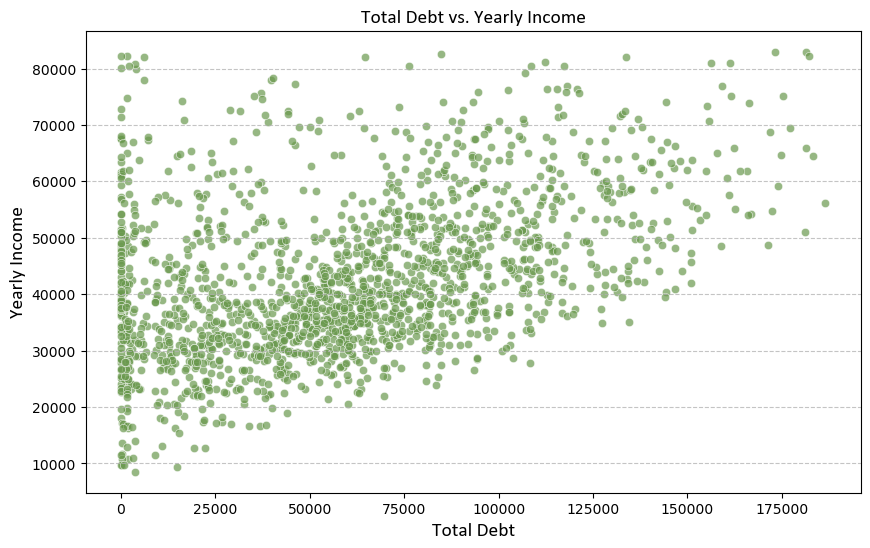

In [25]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatterplot using seaborn
sns.scatterplot(x='total_debt', y='yearly_income', data=df2, color='#6a994e', alpha=0.7)

# Customize the plot with labels and title
plt.xlabel("Total Debt", fontfamily='Calibri', fontsize=14)
plt.ylabel("Yearly Income", fontfamily='Calibri', fontsize=14)
plt.title('Total Debt vs. Yearly Income', fontfamily='Calibri', fontsize=14)

# Add grid lines to improve readability
plt.grid(True, linestyle='--', alpha=0.75, axis='y')

# Show the plot
plt.show()

In [35]:
# Define the function to perform regression
def do_regression_plot(x_values, y_values, x_label, y_label, annotation):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    print(line_eq)

    # Canvas Size
    plt.figure(figsize=(15, 8))

    # Create scatter plot
    plt.scatter(x_values, y_values, color='#6a994e', edgecolor='black', s=75)
    plt.plot(x_values, regress_values, color='black', linewidth=3)

    # Incorporate the other graph properties
    plt.xlabel(x_label, fontfamily='Calibri', fontsize=14)
    plt.ylabel(y_label, fontfamily='Calibri', fontsize=14)
    plt.title(f"{x_label} vs. {y_label}", fontweight="bold", fontfamily='Calibri', fontsize=20)

    # Background Grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

    # Annotation
    plt.annotate(line_eq, annotation, fontsize=14, color="black")

y = 0.15x + 33633.46


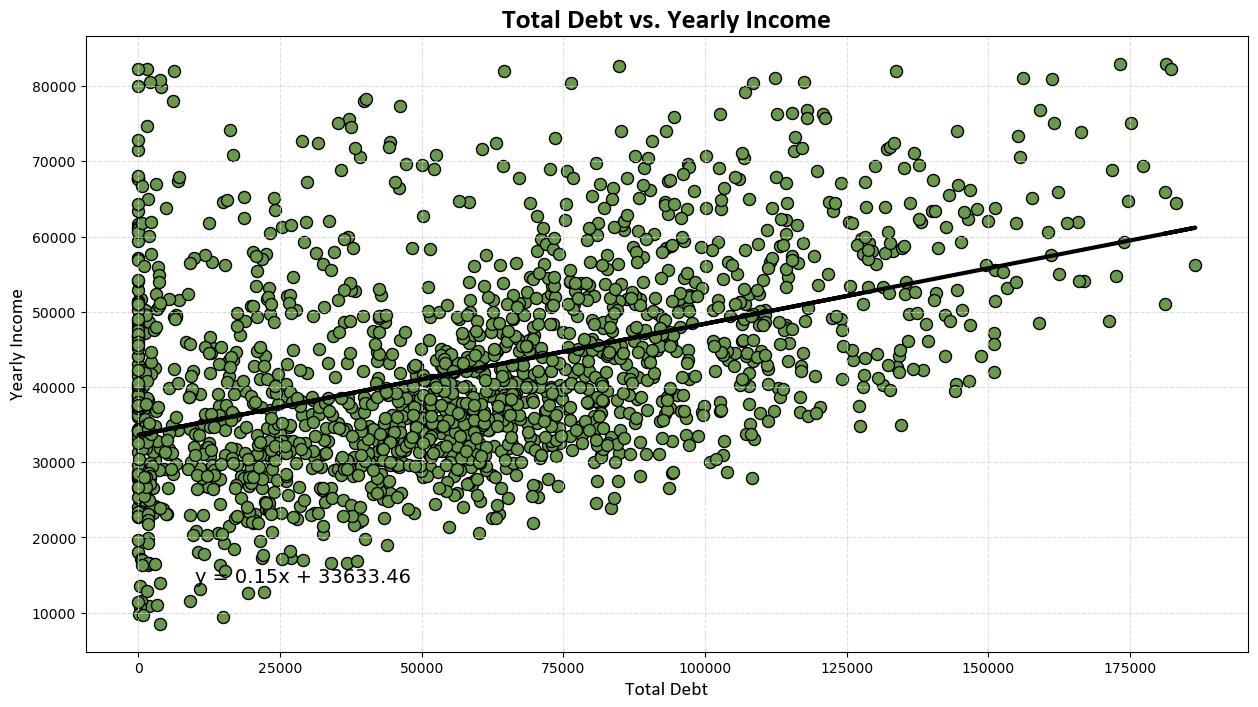

In [37]:
# Linear regression on Debt to Income
x_values = df2.total_debt
y_values = df2.yearly_income
x_label = "Total Debt"
y_label = "Yearly Income"
annotation = (140000, 14000)
do_regression_plot(x_values, y_values, x_label, y_label, annotation)

In [ ]:
df2 = df.copy()

# Generate a bar plot showing the median to debt-to-income levels by age group Pandas.
# Data Viz Recipe
# Define age bins and labels to categorize the age column into groups
age_bins = [18, 30, 40, 50, 60, 70, 100]  # Define age groups
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']  # Age group labels

# Create a new column 'age_group' by categorizing 'age'
df2.loc[:, 'age_group'] = pd.cut(df2['current_age'], bins=age_bins, labels=age_labels, right=False)

# Group by the 'age_group' and calculate the median debt-to-income for each group
data = df2.groupby('age_group', observed=True)['debt_to_income'].median().reset_index()

# Change Canvas Size
plt.figure(figsize=(8, 6))

# Create basic plot using seaborn
sns.barplot(x='age_group', y='debt_to_income', data=data, color= '#A7C957')

# Add grid lines to improve readability
plt.grid(True, linestyle='--', alpha=0.75, axis="y")

# Customize the plot with labels and title
plt.xlabel('Age Group')
plt.ylabel('Median Debt-to-Income Ratio')
plt.title('Median Debt-to-Income Ratio by Age Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Define the color palette
coolors_palette = ["#386641", "#6a994e", "#a7c957", "#ff5714", "#bc4749"]

# Calculate the average debt-to-income ratio by state
state_avg_debt = df2.groupby('state')['total_debt'].mean().reset_index()

# Create a custom colormap from the Coolors palette
cmap = LinearSegmentedColormap.from_list("coolors_gradient", coolors_palette, N=256)

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Use scatterplot with the custom colormap for color mapping
sns.scatterplot(x='state', 
                y='total_debt', 
                data=state_avg_debt,
                hue='total_debt',  # This applies the color scale based on debt-to-income
                palette=cmap,  # Apply the custom colormap
                size='total_debt',  # Optional: size can vary with debt-to-income
                sizes=(50, 200),  # Adjust size range
                legend=None)  # Remove the legend

# Customize the plot with labels and title
plt.xlabel('State')
plt.ylabel('Average Total Debt')
plt.title('Average Total Debt by State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add grid lines to improve readability
plt.grid(True, linestyle='--', alpha=0.75)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Define the color palette
coolors_palette = ["#386641", "#6a994e", "#a7c957", "#ff5714", "#bc4749"]

# Calculate the average debt-to-income ratio by state
state_avg_debt_to_income = df2.groupby('state')['debt_to_income'].mean().reset_index()

# Create a custom colormap from the Coolors palette
cmap = LinearSegmentedColormap.from_list("coolors_gradient", coolors_palette, N=256)

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Use scatterplot with the custom colormap for color mapping
sns.scatterplot(x='state', 
                y='debt_to_income', 
                data=state_avg_debt_to_income,
                hue='debt_to_income',  # This applies the color scale based on debt-to-income
                palette=cmap,  # Apply the custom colormap
                size='debt_to_income',  # Optional: size can vary with debt-to-income
                sizes=(50, 200),  # Adjust size range
                legend=None)  # Remove the legend

# Customize the plot with labels and title
plt.xlabel('State')
plt.ylabel('Average Debt-to-Income Ratio')
plt.title('Average Debt-to-Income Ratio by State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add grid lines to improve readability
plt.grid(True, linestyle='--', alpha=0.75)

# Display the plot
plt.tight_layout()
plt.show()